## libraries

In [329]:
import pandas as pd
import numpy as np
import requests
import os
import json
import tweepy 
import time
import re
from functools import reduce
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Gathering Data

In [194]:
# in this project we should gather date from three sources
# from csv file called twitter-archive-enanced
# from url and save content in tsv file 
# from twitter APi then save content in json file 

In [195]:
# first source using pd.read_csv we can read it 
Twitter_archive_enhanced=pd.read_csv('twitter-archive-enhanced.csv')
Twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [134]:
# using url by using requests library then using with open to make file and write content that we extract from url

URL=' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(URL)
with open('image_predictions.tsv','wb') as file:
    file.write(response.content)


In [196]:
# after making file we can read it by pd.read_csv but we should add sep='\t' because the file type is tsv
image_prediction=pd.read_csv('image_predictions.tsv',sep='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [136]:
# in this step we access in twitter API i make devoloper account so i can get keys and tokens 
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [138]:
# now we can get date from API first make list to put date in it and errors list to
# because some tweets content may lost so i use try and excpet 
twitter_list=[]
errors=[]
start_time = time.time()
for tweet_id in Twitter_archive_enhanced['tweet_id']:
    try:
        tweet=api.get_status(tweet_id, tweet_mode='extended',wait_on_rate_limit=True,
                             wait_on_rate_limit_notify=True)._json
        Retweets_count=tweet['retweet_count']
        Favorites_count=tweet['favorite_count']
        Date_time = tweet['created_at']
        twitter_list.append({'tweet_id':int(tweet_id),
                            'Retweets_count':int(Retweets_count),
                            'Favorites_count':int(Favorites_count),
                             'Date_time':pd.to_datetime(Date_time)})
    except:
        print(tweet_id)
        errors.append(tweet_id)
end_time = time.time()
print(end_time - start_time)


      


888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
851953902622658560
845459076796616705
844704788403113984
842892208864923648
837366284874571778
837012587749474308
829374341691346946
827228250799742977
812747805718642688
802247111496568832
779123168116150273
775096608509886464
771004394259247104
770743923962707968
759566828574212096
Rate limit reached. Sleeping for: 736
754011816964026368
680055455951884288
Rate limit reached. Sleeping for: 734
1910.2050726413727


In [139]:
#after getting data we should make it as DataFrame 
#then save data in file name 'tweet_json.txt'
tweet_json_df=pd.DataFrame(twitter_list,columns=['tweet_id','Retweets_count',
                                                   'Favorites_count','Date_time'])
tweet_json_df.to_csv('tweet_json.txt',encoding='utf-8',index=False)

In [197]:
# red tweet_json and take look 
tweet_json_df = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
tweet_json_df

,tweet_id,Retweets_count,Favorites_count,Date_time
0,892420643555336193,7493,35483,2017-08-01 16:23:56
1,892177421306343426,5560,30709,2017-08-01 00:17:27
2,891815181378084864,3681,23088,2017-07-31 00:18:03
3,891689557279858688,7670,38777,2017-07-30 15:58:51
4,891327558926688256,8275,37040,2017-07-29 16:00:24
5,891087950875897856,2771,18678,2017-07-29 00:08:17
6,890971913173991426,1799,10857,2017-07-28 16:27:12
7,890729181411237888,16782,59815,2017-07-28 00:22:40
8,890609185150312448,3824,25691,2017-07-27 16:25:51
9,890240255349198849,6514,29341,2017-07-26 15:59:51


In [141]:
#read error list 
errors


[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 851953902622658560,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837366284874571778,
 837012587749474308,
 829374341691346946,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 779123168116150273,
 775096608509886464,
 771004394259247104,
 770743923962707968,
 759566828574212096,
 754011816964026368,
 680055455951884288]

In [142]:
# number of errors
len(errors)

25

In [144]:
# we find that we have 2331 correct tweet id
# we have 25 error in error list 
# we take 1910 seconds it's mean 31.83 minutes 

# Assessing Data

In [145]:
# Display the Twitter_archive_enhanced table
Twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [198]:
Twitter_archive_enhanced.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1277,709042156699303936,NaN,NaN,2016-03-13 15:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Klevin. He's addicted to sandwiches (y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709042156...,9,10,Klevin,None,None,None,None
988,748977405889503236,NaN,NaN,2016-07-01 20:31:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What jokester sent in a pic without a dog in i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748977405...,10,10,not,None,None,None,None
968,750147208377409536,NaN,NaN,2016-07-05 02:00:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","And finally, happy 4th of July from the squad ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/750147208...,13,10,None,None,None,None,None
1007,747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747600769...,10,10,Bookstore,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None



### Quality problems 
####  1- hard to read timestamp column data
####  2- hard to read source coulmn data
#### 3- by visual assessment in excel i found some wrong rating_numerator like (75)
#### 4- by visual assessment in excel i found some wrong names like (a)
#### 5- name has values that are None instead of NaN

### Tidiness problems
####  1- there are 4 columns about dog type (doggo,floofer,pupper,puppo)

In [146]:
Twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [199]:
Twitter_archive_enhanced['tweet_id'].duplicated().any()

False

### Quality problems
#### 1- (in_reply_to_status_id , in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id)  must be  int or object not float
#### 2- expanded_urls  have empty rows

In [147]:
# Display the  image_prediction table 
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
623,680583894916304897,https://pbs.twimg.com/media/CXHrcFYWcAEE5_L.jpg,1,tub,0.889801,False,bathtub,0.032351,False,hippopotamus,0.014177,False
1951,863432100342583297,https://pbs.twimg.com/media/C_uG6eAUAAAvMvR.jpg,1,Staffordshire_bullterrier,0.690517,True,French_bulldog,0.103360,True,beagle,0.079489,True
1391,766793450729734144,https://pbs.twimg.com/media/CqQykxrWYAAlD8g.jpg,1,beagle,0.451697,True,basset,0.197513,True,bloodhound,0.072699,True
344,672267570918129665,https://pbs.twimg.com/media/CVRfyZxWUAAFIQR.jpg,1,Irish_terrier,0.716932,True,miniature_pinscher,0.051234,True,Airedale,0.044381,True
360,672640509974827008,https://pbs.twimg.com/media/CVWy9v-VAAALSoE.jpg,1,Chesapeake_Bay_retriever,0.420155,True,Cardigan,0.266030,True,Labrador_retriever,0.042514,True
601,679777920601223168,https://pbs.twimg.com/media/CW8OYajUMAAPRoF.jpg,1,bloodhound,0.528819,True,bull_mastiff,0.420119,True,French_bulldog,0.009481,True
1934,859851578198683649,https://pbs.twimg.com/media/C-7OcfyXsAAsqzU.jpg,4,Labrador_retriever,0.899086,True,golden_retriever,0.047091,True,kuvasz,0.023206,True
465,675006312288268288,https://pbs.twimg.com/media/CV4aqCwWsAIi3OP.jpg,1,boxer,0.654697,True,space_heater,0.043389,False,beagle,0.042848,True
1708,817827839487737858,https://pbs.twimg.com/ext_tw_video_thumb/81782...,1,cocker_spaniel,0.387608,True,golden_retriever,0.264844,True,Pekinese,0.122123,True
522,676582956622721024,https://pbs.twimg.com/media/CWO0m8tUwAAB901.jpg,1,seat_belt,0.790028,False,Boston_bull,0.196307,True,French_bulldog,0.012429,True


In [148]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [149]:
image_prediction['jpg_url'].value_counts()

https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg                                            2
https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg                                            2
https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg                                            2
https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg                                            2
https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg                                            2
https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg                                            2
https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg                                            2
https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg                                            2
https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg                       

In [150]:
image_prediction.query('jpg_url=="https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1469,779056095788752897,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,Chihuahua,0.721188,True,toy_terrier,0.112943,True,kelpie,0.053365,True
1615,802247111496568832,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,Chihuahua,0.721188,True,toy_terrier,0.112943,True,kelpie,0.053365,True


### Quality problems 
#### 1- we have 2075 row only we should have 2356
#### 2- by look at last query i made we find that 2 different tweet_id have the same jpg_url

In [151]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
tweet_id           2331 non-null int64
Retweets_count     2331 non-null int64
Favorites_count    2331 non-null int64
Date_time          2331 non-null object
dtypes: int64(3), object(1)
memory usage: 72.9+ KB


In [200]:
Twitter_archive_enhanced['name'].value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Bailey         7
Daisy          7
Buddy          7
an             7
Toby           7
Koda           6
Stanley        6
Leo            6
Scout          6
Bella          6
Rusty          6
Jack           6
Milo           6
Dave           6
Jax            6
Oscar          6
Gus            5
            ... 
Fabio          1
Teddy          1
Kuyu           1
Dobby          1
O              1
Naphaniel      1
Ed             1
Cupid          1
Karll          1
Tilly          1
Cheryl         1
Colin          1
Trigger        1
Storkson       1
Jo             1
Eevee          1
Ginger         1
Stephanus      1
Laika          1
Peanut         1
Kota           1
Rueben         1
Juckson        1
Binky          1
Ace            1
Sweet          1
Kayla          1
Milky         

### Quality problems
wrong names like (a)

### Tidiness problems
#### we have 3 tables we can mereg these tables 

# Summary 
##### (not all will be celaned)
### Quality Problems
#####   hard to read timestamp column data
#####   hard to read source coulmn data
#####   by visual assessment in excel i found some wrong rating_numerator like (75)
#####   by visual assessment in excel i found some wrong rating_denominator like (15)
#####   expanded_urls  have empty rows
#####   (in_reply_to_status_id , in_reply_to_user_id, retweeted_status_id,     retweeted_status_user_id)  must be  int or object not float
#####  we have 2075 row only we should have 2356
#####   find that 2 different tweet_id have the same jpg_url
#####  remove data that have retweets
####   name has values that are None instead of NaN
####   wrong names like (a)
### Tidiness Problems
#####  there are 4 columns about dog type (doggo,floofer,pupper,puppo)
#####  we have 3 tables we can mereg these tables







# Cleaning

In [234]:
# making copy from all data
Twitter_archive_enhanced_clean=Twitter_archive_enhanced.copy()
image_prediction_clean=image_prediction.copy()
tweet_json_df_clean=tweet_json_df.copy()


#### Define 
#### Tidiness
Mereg three tables in one dataset

#### Code

In [235]:
# I try to find way to mereg three tables and i find way in this link below 
# https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
# I learn it and i will try it now , but should in python 3 import reduce from functools
df=[Twitter_archive_enhanced_clean,image_prediction_clean,tweet_json_df_clean]
Twitter_all_data= reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), df)

#### Test

In [236]:
Twitter_all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 31 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
doggo                         2059 non-null object
floofer                       2059 non-null object
pupper                        2059 non-null object
puppo                         2059 non-null object
jpg_url                       2059 

#### Define
#### Tidiness
there are 4 columns about dog type (doggo,floofer,pupper,puppo) i want to merge 
all in one column 

#### Code


In [237]:
dogs_list=[]

for types in Twitter_all_data['text']:
    res=re.findall('\\b' + '(doggo|floofer|pupper|puppo)' + '\\b',types)
    if len(res)<1:
        dogs_list.append(None)
    
    else:
        dogs_list.append(res[0])


     
    
   

In [238]:
Twitter_all_data['dog_type']=dogs_list

In [239]:
Twitter_all_data=Twitter_all_data.drop(['doggo','floofer','pupper','puppo'],axis=1)

In [240]:
# replace None to NAN in dog_type column
Twitter_all_data.dog_type.fillna(value=np.nan, inplace=True)

#### Test

In [241]:
Twitter_all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 28 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
jpg_url                       2059 non-null object
img_num                       2059 non-null int64
p1                            2059 non-null object
p1_conf                       2059 non-null float64
p1_dog                        2059 

#### Quality-1
#### Define
change datatype of timestamp to datetime

#### Code

In [242]:
Twitter_all_data['timestamp']= pd.to_datetime(Twitter_all_data['timestamp'])

#### Test

In [243]:
Twitter_all_data['timestamp'].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

#### Quality-2
#### Define 
Make source easy to read

#### Code 

In [244]:
# I try to find way to extract words from source i find re.findall method it make a list of world that found
# I find examples in https://www.geeksforgeeks.org/python-extract-words-from-given-string/
# and more examples in https://stackoverflow.com/questions/54475736/doubling-slash-with-re-findall-python
clear_source=[]
for source in Twitter_all_data['source']:
    clear_source.append(re.findall(r'>(.*?)<', source)[0])
    
     
   
    


In [245]:
Twitter_all_data['source']= clear_source

#### test

In [246]:
Twitter_all_data['source'].value_counts()

Twitter for iPhone    2019
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

#### Quality-3
#### Define
correct rating_denominator coulmns all values should be 10

#### Code

In [247]:
Twitter_all_data['rating_denominator']=10

#### Test

In [248]:
Twitter_all_data.query('rating_denominator !="10"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Retweets_count,Favorites_count,Date_time,dog_type


#### Quality-4
#### Define
in rating_numerator column there are wrong ratings that different about the rating in text column 

#### Code

In [249]:
# so i make code to correct this fault first i make list to save ratings in it 
# then i make for loop to read text by text and add in list the extract rating by use re.findall
ratings=[]
for rating in Twitter_all_data['text']:
    ratings.append(re.findall(r'((?:\d+\.)?\d+)\/\d+', rating)[0])
    
    


In [250]:
# Then i put ratings in rating_numerator column
Twitter_all_data['rating_numerator']=ratings

#### Test

In [251]:
# i test here if first value i saw still here or no note that 75 wrong value 

Twitter_all_data.query('rating_numerator=="75"')


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Retweets_count,Favorites_count,Date_time,dog_type


In [252]:
# correct value of it is 9.75 let's test it
Twitter_all_data.query('rating_numerator=="9.75"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Retweets_count,Favorites_count,Date_time,dog_type
548,786709082849828864,NaN,NaN,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,...,Persian_cat,0.122978,False,chow,0.102654,True,6096,18190,2016-10-13 23:23:56,NaN


#### Quality-5
#### Define
remove retweets data but if retweeted_status_id equal NaN i will kept it 
remove retweeted_status_user_id  ,retweeted_status_id and retweeted_status_timestamp

#### Code

In [253]:
# first i will kep data that it's retweeted_status_id equal NaN

Twitter_all_data=Twitter_all_data[np.isnan(Twitter_all_data['retweeted_status_id'])]
#then drope retweeted three columns
Twitter_all_data=Twitter_all_data.drop(['retweeted_status_timestamp','retweeted_status_user_id',
                                       'retweeted_status_id'],axis=1)



#### Test

In [254]:
Twitter_all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 25 columns):
tweet_id                 1987 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1987 non-null datetime64[ns]
source                   1987 non-null object
text                     1987 non-null object
expanded_urls            1987 non-null object
rating_numerator         1987 non-null object
rating_denominator       1987 non-null int64
name                     1987 non-null object
jpg_url                  1987 non-null object
img_num                  1987 non-null int64
p1                       1987 non-null object
p1_conf                  1987 non-null float64
p1_dog                   1987 non-null bool
p2                       1987 non-null object
p2_conf                  1987 non-null float64
p2_dog                   1987 non-null bool
p3                       1987 non-null object
p3_conf           

#### Quality-6
#### Define 
name has values that are None instead of NaN 

#### Code

In [255]:
Twitter_all_data.name.replace('None',value=np.nan, inplace=True)

#### Test

In [256]:
#when i test here i find some names doesn't true names and it's start 
#with lowercase so i will fix it next
Twitter_all_data.name.value_counts()

a               55
Charlie         10
Oliver          10
Cooper          10
Lucy             9
Penny            9
Tucker           9
Winston          8
Sadie            8
the              7
Daisy            7
Lola             7
Toby             7
Koda             6
Stanley          6
Bella            6
Jax              6
an               6
Bo               6
Bailey           5
Oscar            5
Milo             5
Buddy            5
Chester          5
Leo              5
Rusty            5
Scout            5
Dave             5
Louis            5
Gary             4
                ..
Thor             1
Lipton           1
Shakespeare      1
Superpup         1
Hercules         1
Milky            1
Grizzie          1
Kayla            1
Ed               1
Karll            1
Tilly            1
Cheryl           1
Colin            1
Trigger          1
Storkson         1
Tyrone           1
Betty            1
Eevee            1
Obi              1
Ginger           1
Stephanus        1
Laika       

#### Quality-7
#### Define
some names are wrong names so i will make it Nan

#### Code

In [257]:
# first should get all names that start with lowercase
# after first try i can't do it because name column datatype wasn'str
#so i convert it 
Twitter_all_data['name']=Twitter_all_data['name'].astype(str)
lowercase_list=[]
for lower_case in Twitter_all_data['name']:
    if lower_case[0].islower()and lower_case not in lowercase_list:
        lowercase_list.append(lower_case)
print(lowercase_list)

['nan', 'such', 'a', 'quite', 'one', 'incredibly', 'very', 'my', 'not', 'his', 'an', 'just', 'getting', 'this', 'unacceptable', 'all', 'infuriating', 'the', 'actually', 'by', 'officially', 'light', 'space']


In [258]:
Twitter_all_data.name.replace(lowercase_list,value=np.nan, inplace=True)

#### Test

In [259]:
Twitter_all_data.name.value_counts()

Oliver          10
Charlie         10
Cooper          10
Penny            9
Tucker           9
Lucy             9
Sadie            8
Winston          8
Lola             7
Toby             7
Daisy            7
Koda             6
Jax              6
Stanley          6
Bo               6
Bella            6
Scout            5
Chester          5
Bailey           5
Leo              5
Buddy            5
Rusty            5
Dave             5
Oscar            5
Milo             5
Louis            5
Jack             4
Duke             4
Brody            4
Clarence         4
                ..
Lenox            1
Vince            1
Nigel            1
Snicku           1
Theo             1
Ace              1
Binky            1
Juckson          1
Storkson         1
Clifford         1
Burt             1
Grizzie          1
Ed               1
Karll            1
Tilly            1
Cheryl           1
Colin            1
Trigger          1
Tyrone           1
Rueben           1
Betty            1
Eevee       

#### Quality-8
#### Define
change some datatype

#### Code

In [260]:
Twitter_all_data['tweet_id']=Twitter_all_data['tweet_id'].astype(str)
Twitter_all_data['source']=Twitter_all_data['source'].astype('category')
Twitter_all_data['in_reply_to_status_id']=Twitter_all_data['in_reply_to_status_id'].astype(str)
Twitter_all_data['in_reply_to_user_id']=Twitter_all_data['in_reply_to_user_id'].astype(str)
Twitter_all_data['rating_numerator']=Twitter_all_data['rating_numerator'].astype(float)
Twitter_all_data['dog_type']=Twitter_all_data['dog_type'].astype('category')

In [261]:
Twitter_all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 25 columns):
tweet_id                 1987 non-null object
in_reply_to_status_id    1987 non-null object
in_reply_to_user_id      1987 non-null object
timestamp                1987 non-null datetime64[ns]
source                   1987 non-null category
text                     1987 non-null object
expanded_urls            1987 non-null object
rating_numerator         1987 non-null float64
rating_denominator       1987 non-null int64
name                     1343 non-null object
jpg_url                  1987 non-null object
img_num                  1987 non-null int64
p1                       1987 non-null object
p1_conf                  1987 non-null float64
p1_dog                   1987 non-null bool
p2                       1987 non-null object
p2_conf                  1987 non-null float64
p2_dog                   1987 non-null bool
p3                       1987 non-null object
p3_conf     

#### Define
we have timestamp and Date_time both are the same so i will drop Data_time

#### Code


In [262]:
Twitter_all_data=Twitter_all_data.drop(['Date_time'],axis=1)

#### Test

In [263]:
Twitter_all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 24 columns):
tweet_id                 1987 non-null object
in_reply_to_status_id    1987 non-null object
in_reply_to_user_id      1987 non-null object
timestamp                1987 non-null datetime64[ns]
source                   1987 non-null category
text                     1987 non-null object
expanded_urls            1987 non-null object
rating_numerator         1987 non-null float64
rating_denominator       1987 non-null int64
name                     1343 non-null object
jpg_url                  1987 non-null object
img_num                  1987 non-null int64
p1                       1987 non-null object
p1_conf                  1987 non-null float64
p1_dog                   1987 non-null bool
p2                       1987 non-null object
p2_conf                  1987 non-null float64
p2_dog                   1987 non-null bool
p3                       1987 non-null object
p3_conf     

### Storeing


In [264]:
Twitter_all_data.to_csv('twitter_archive_master.csv',index=False)

### Analyzing and Visualizing

In [265]:
#read twitter_archive_master file
df_all= pd.read_csv('twitter_archive_master.csv')

In [266]:
df_all.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Retweets_count,Favorites_count,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,...,False,bagel,0.085851,False,banana,0.076110,False,7493,35483,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,...,True,Pekinese,0.090647,True,papillon,0.068957,True,5560,30709,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,...,True,malamute,0.078253,True,kelpie,0.031379,True,3681,23088,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7670,38777,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8275,37040,NaN


### 1-  What is The most popular dog?

In [284]:
df_all['dog_type'].value_counts()

pupper     200
doggo       65
puppo       22
floofer      3
Name: dog_type, dtype: int64

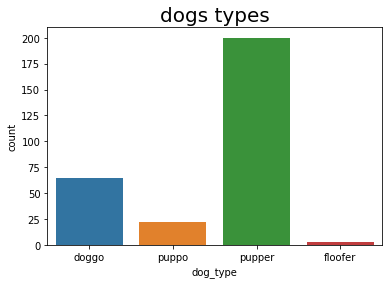

In [283]:
# i want to make plot put count plot so i find how to make this function here below
# https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.countplot(data=df_all, x='dog_type')
plt.title('dogs types',size=20);


#### The most popular dog is Pupper

### 2- What is the most popular source

In [285]:
df_all['source'].value_counts()

Twitter for iPhone    1949
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

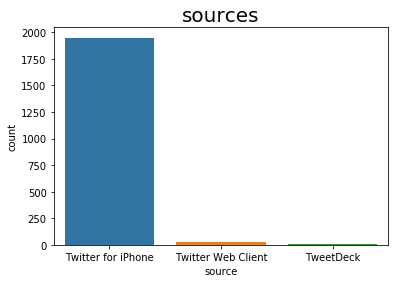

In [286]:
sns.countplot(data=df_all, x='source')
plt.title('sources',size=20);

#### The most popular source is Twitter for iphone

### 3- What is the most common rating? 

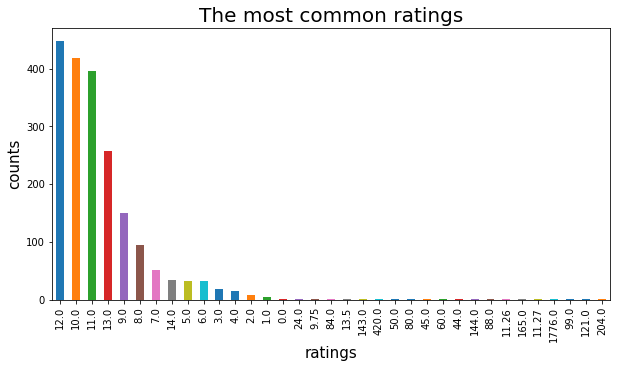

In [352]:
df_all['rating_numerator'].value_counts().plot(kind='bar',figsize=(10,5))
plt.xlabel('ratings',size=15)
plt.ylabel('counts',size=15)
plt.title('The most common ratings',size=20);


#### The most common rating is 12